# First PyTorch Neural Network - MNIST Classifier

Make Your First GAN With PyTorch, 2020

In [3]:
# mount drive to access data files

# from google.colab import drive
# drive.mount('./mount')

In [4]:
# import libraries

import torch
import torch.nn as nn

from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

## DataSet Class

In [49]:
# dataset class

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        
        self.data_df = pandas.read_csv(csv_file, header=None)
        
        pass
    
    def __len__(self):

        return len(self.data_df)
    
    def __getitem__(self, index):
        
        # 目标图像 (标签)

        label = self.data_df.iloc[index, 0]

        target = torch.zeros((10))

        target[label] = 1.0 # 独热编码

        # 图像数据, 取值范围是0~255，标准化为0~1
        image_values = torch.FloatTensor(self.data_df.iloc[index, 1:].values) / 255.0

        # 返回标签、图像数据张量以及目标张量
        return label, image_values, target

    def plot_image(self, index):

        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)

        plt.title("label = " + str(self.data_df.iloc[index, 0]) + '  index= ' + str(index))
        plt.imshow(img, interpolation='none', cmap='Blues')
        plt.pause(0.02)
        pass

    pass


## Load Data

In [50]:
mnist_dataset = MnistDataset('..\mnist\mnist_train.csv')

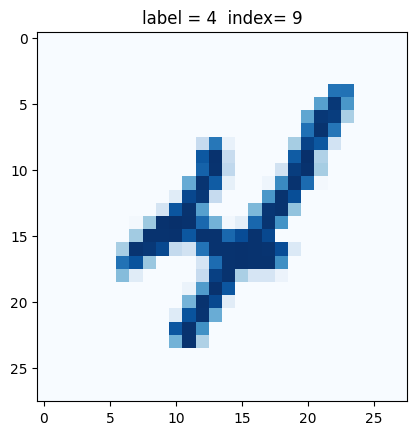

In [51]:
# check data contains images

mnist_dataset.plot_image(9)

In [9]:
# 检查是否能通过索引访问得到标签、像素值和目标张量

mnist_dataset[100]

(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

## Neural Network Class

In [59]:
# classifier class

class Classifier(nn.Module):
    
    def __init__(self):
        
        # 初始化PyTorch父类
        super().__init__() 

        # 定义神经网络层
        self.model = nn.Sequential( 
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )
        
        # 创建损失函数
        self.loss_function = nn.MSELoss() # create loss function

        # 创建优化器，使用简单的梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # 记录训练进展的计数器和列表
        self.counter = 0
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        #
        # 直接运行模型
        #
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        #
        # 计算网络的输出值
        #
        outputs = self.forward(inputs)
        
        #
        # 计算损失值
        #
        loss = self.loss_function(outputs, targets)

        #
        # 每隔100个训练样本增加一次计数器的值，并将损失值添加进列表的末尾
        #
        self.counter += 1
        
        if (self.counter % 100 == 0):
        
            self.progress.append(loss.item())
            
            pass
        
        if (self.counter % 10000 == 0):
        
            print("counter = ", self.counter)
            
            pass

        # 梯度归零，反向传播，并更新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        
        df = pandas.DataFrame(self.progress, columns=['loss'])
        
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        
        pass
    
    pass

## Train Neural Network

In [12]:
%%time

# 创建神经网络
C = Classifier()

# 在MNIST数据集训练神经网络
epochs = 4

for i in range(epochs):

    print('training epoch', i+1, "of", epochs)

    for label, image_data_tensor, target_tensor in mnist_dataset:

        C.train(image_data_tensor, target_tensor)

        pass

    pass

training epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
CPU times: total: 16min 25s
Wall time: 3min 36s


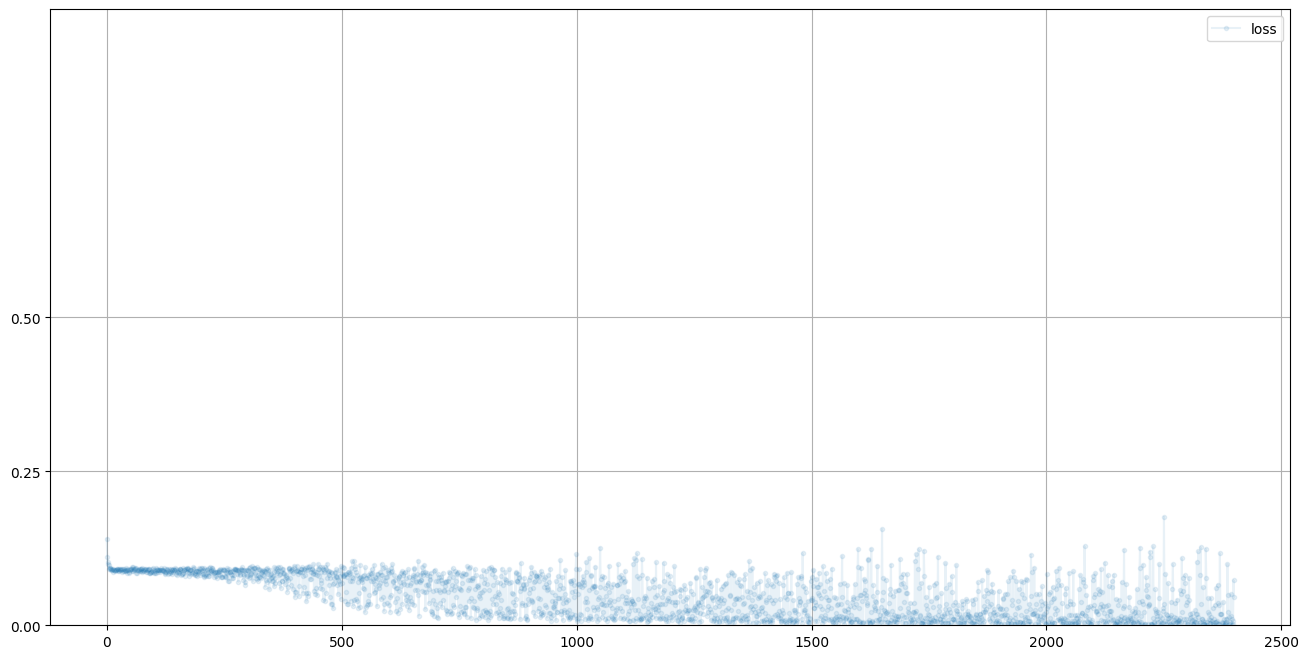

In [13]:
# plot classifier error
C.plot_progress()

## Classification Example

In [52]:
# 加载MNIST测试数据
mnist_test_dataset = MnistDataset('..\mnist\mnist_train.csv')

In [ ]:
plt.figure()
for i in range(100):
    #  挑选一幅图像
    record = i
    # 绘制图像和标签
    mnist_test_dataset.plot_image(record)
    plt.pause(0.02)

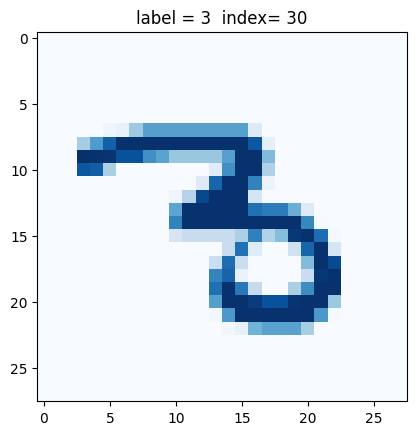

In [56]:
# 挑选一幅图像
record = 30
# 绘制图像和标签
mnist_test_dataset.plot_image(record)

<AxesSubplot:>

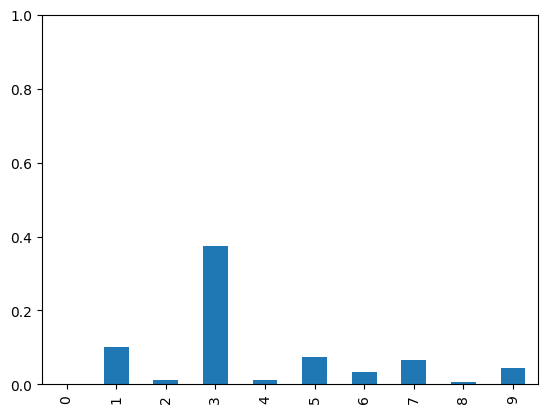

In [57]:
# visualise the answer given by the neural network

image_data = mnist_test_dataset[record][1]

# query from trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

## Classifier Performance

In [58]:
# test trained neural network on training data

score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_test_dataset:
    
    answer = C.forward(image_data_tensor).detach().numpy()
    
    if (answer.argmax() == label):
    
        score += 1
    
        pass
    
    items += 1
    
    pass

print(score, items, score/items)

52359 60000 0.87265
